# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [68]:
# %pip install matplotlib-venn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [164]:
# Loading the quarterly data for Geopolitical Risk Index (GPR)
filename = 'GPR_quarter.xlsx'
gpr = pd.read_excel(filename, index_col=0, parse_dates=True)

# Selecting the columns with the country specific hisotrical GPR index
gpr = gpr[[col for col in gpr.columns if col.startswith('GPRHC_')]]
gpr.head(5)

# Melt the DataFrame to long format
gpr_long = gpr.reset_index().melt(id_vars='Date', var_name='Country', value_name='GPRH')
gpr_long.set_index('Date', inplace=True)
gpr_long.head(10)

,Country,GPRH
Date,,
1900-01-01,GPRHC_ARG,0.017573
1900-04-01,GPRHC_ARG,0.000000
1900-07-01,GPRHC_ARG,0.026942
1900-10-01,GPRHC_ARG,0.017830
1901-01-01,GPRHC_ARG,0.004865
1901-04-01,GPRHC_ARG,0.009636
1901-07-01,GPRHC_ARG,0.014735
1901-10-01,GPRHC_ARG,0.122224
1902-01-01,GPRHC_ARG,0.026908


In [165]:
filename = 'country_lookup.xlsx'
country_lookup = pd.read_excel(filename)

gpr_long = gpr_long.reset_index().merge(country_lookup, on='Country', how='left').set_index(['Date', 'Country_name'])
gpr_long.reset_index(inplace=True)
gpr_long.drop(columns='Country', inplace=True)
gpr_long.head(10)

,Date,Country_name,GPRH
0,1900-01-01,Argentina,0.017573
1,1900-04-01,Argentina,0.000000
2,1900-07-01,Argentina,0.026942
3,1900-10-01,Argentina,0.017830
4,1901-01-01,Argentina,0.004865
5,1901-04-01,Argentina,0.009636
6,1901-07-01,Argentina,0.014735
7,1901-10-01,Argentina,0.122224
8,1902-01-01,Argentina,0.026908
9,1902-04-01,Argentina,0.009149


In [166]:
# gpr_long.loc[gpr_long.index.get_level_values('Country_name') == 'Denmark', :]

In [192]:
filename = 'dots_imf.xlsx'
dots_imf = pd.read_excel(filename)

In [193]:
dots_imf['Trade'] = dots_imf['Export'] + dots_imf['Import']

dots_imf['tot_trade'] = dots_imf.groupby(['Country_Name', 'Date'])['Trade'].transform('sum')
dots_imf['trade_share'] = dots_imf['Trade'] / dots_imf['tot_trade']
dots_imf['check'] = dots_imf.groupby(['Country_Name', 'Date'])['trade_share'].transform('sum')
dots_imf['Date'] = pd.to_datetime(dots_imf['Date']).dt.to_period('Q').dt.start_time
dots_imf = dots_imf.rename(columns={'Country_Name': 'imf_name'})
dots_imf = dots_imf.rename(columns={'Counterpart_Country_Name': 'imf_name_counterpart'})
dots_imf.head(5)

,imf_name,Country_Code,imf_name_counterpart,Counterpart_Country_Code,Date,Export,Import,Trade,tot_trade,trade_share,check
0,United Kingdom,112,United States,111,1960-01-01,281500000.0,338500000.0,620000000.0,4.063600e+09,0.152574,1.0
1,United Kingdom,112,United States,111,1960-04-01,258600000.0,386600000.0,645200000.0,4.110800e+09,0.156952,1.0
2,United Kingdom,112,United States,111,1960-07-01,197900000.0,399600000.0,597500000.0,3.890000e+09,0.153599,1.0
3,United Kingdom,112,United States,111,1960-10-01,222900000.0,464600000.0,687500000.0,4.199100e+09,0.163726,1.0
4,United Kingdom,112,United States,111,1961-01-01,187200000.0,370800000.0,558000000.0,4.141100e+09,0.134747,1.0


In [194]:
filename = 'imf_name_lookup.xlsx'
imf_lookup = pd.read_excel(filename)
filename = 'imf_name_cp_lookup.xlsx'
imf_lookup_cp = pd.read_excel(filename)
dots_imf = dots_imf.reset_index().merge(imf_lookup, on='imf_name', how='left')
dots_imf = dots_imf.reset_index().merge(imf_lookup_cp, on='imf_name_counterpart', how='left')

In [195]:
dots_imf = dots_imf.rename(columns={'Country_name_x': 'country'})
dots_imf = dots_imf.rename(columns={'Country_name_y': 'counterpart'})
dots_imf.head(5)

,level_0,index,imf_name,Country_Code,imf_name_counterpart,Counterpart_Country_Code,Date,Export,Import,Trade,tot_trade,trade_share,check,country,counterpart
0,0,0,United Kingdom,112,United States,111,1960-01-01,281500000.0,338500000.0,620000000.0,4.063600e+09,0.152574,1.0,United Kingdom,United States
1,1,1,United Kingdom,112,United States,111,1960-04-01,258600000.0,386600000.0,645200000.0,4.110800e+09,0.156952,1.0,United Kingdom,United States
2,2,2,United Kingdom,112,United States,111,1960-07-01,197900000.0,399600000.0,597500000.0,3.890000e+09,0.153599,1.0,United Kingdom,United States
3,3,3,United Kingdom,112,United States,111,1960-10-01,222900000.0,464600000.0,687500000.0,4.199100e+09,0.163726,1.0,United Kingdom,United States
4,4,4,United Kingdom,112,United States,111,1961-01-01,187200000.0,370800000.0,558000000.0,4.141100e+09,0.134747,1.0,United Kingdom,United States


In [196]:
dots_imf = dots_imf[['Date','country', 'counterpart', 'trade_share']]
dots_imf = dots_imf.rename(columns={'country': 'Country_name', 'counterpart': 'Counterpart_name'})
dots_imf.head(5)

,Date,Country_name,Counterpart_name,trade_share
0,1960-01-01,United Kingdom,United States,0.152574
1,1960-04-01,United Kingdom,United States,0.156952
2,1960-07-01,United Kingdom,United States,0.153599
3,1960-10-01,United Kingdom,United States,0.163726
4,1961-01-01,United Kingdom,United States,0.134747


In [197]:
dots_imf.set_index(['Date', 'Country_name'], inplace=True)
dots_imf.head(5)

,,Counterpart_name,trade_share
Date,Country_name,,
1960-01-01,United Kingdom,United States,0.152574
1960-04-01,United Kingdom,United States,0.156952
1960-07-01,United Kingdom,United States,0.153599
1960-10-01,United Kingdom,United States,0.163726
1961-01-01,United Kingdom,United States,0.134747


In [198]:
dots_imf = dots_imf.sort_values(['Country_name', 'Date'])
dots_imf.head(5)

Counterpart_name  trade_share
Date       Country_name                                 
1960-01-01 Argentina          United States     0.200482
           Argentina         United Kingdom     0.172904
           Argentina     Belgium-Luxembourg     0.026921
           Argentina                Denmark     0.003064
           Argentina                 France     0.048588

In [208]:
# dots_imf = dots_imf.reset_index().rename(columns={'country': 'Country_name'})
merged_df = dots_imf.reset_index().merge(gpr_long, on=['Country_name', 'Date'], how='left')

In [209]:
merged_df = merged_df.rename(columns={'Country_name': 'name', 'Counterpart_name': 'Country_name'})
merged_df.head(5)

,Date,name,Country_name,trade_share,GPRH
0,1960-01-01,Argentina,United States,0.200482,0.084436
1,1960-01-01,Argentina,United Kingdom,0.172904,0.084436
2,1960-01-01,Argentina,Belgium-Luxembourg,0.026921,0.084436
3,1960-01-01,Argentina,Denmark,0.003064,0.084436
4,1960-01-01,Argentina,France,0.048588,0.084436


In [210]:
merged_df_2 = merged_df.reset_index().merge(gpr_long, on=['Country_name', 'Date'], how='left')

In [211]:
merged_df_2.head(20)

,index,Date,name,Country_name,trade_share,GPRH_x,GPRH_y
0,0,1960-01-01,Argentina,United States,0.200482,0.084436,2.614833
1,1,1960-01-01,Argentina,United Kingdom,0.172904,0.084436,0.853895
2,2,1960-01-01,Argentina,Belgium-Luxembourg,0.026921,0.084436,NaN
3,3,1960-01-01,Argentina,Denmark,0.003064,0.084436,0.010013
4,4,1960-01-01,Argentina,France,0.048588,0.084436,0.951327
5,5,1960-01-01,Argentina,Germany,0.128256,0.084436,0.547535
6,6,1960-01-01,Argentina,Italy,0.086890,0.084436,0.187204
7,7,1960-01-01,Argentina,Netherlands,0.071132,0.084436,0.026899
8,8,1960-01-01,Argentina,Norway,0.006347,0.084436,0.020199
9,9,1960-01-01,Argentina,Sweden,0.013132,0.084436,0.030559


In [214]:
merged_df_2['product'] = merged_df_2['trade_share'] * merged_df_2['GPRH_y']
merged_df_2['sumproduct'] = merged_df_2.groupby(['Date', 'name'])['product'].transform('sum')

In [217]:
merged_df_2['GPRH_trade_weigth'] = merged_df_2['sumproduct'] + merged_df_2['GPRH_x']
merged_df_2.head(50)

,index,Date,name,Country_name,trade_share,GPRH_x,GPRH_y,product,sumproduct,GPRH_trade_weigth
0,0,1960-01-01,Argentina,United States,0.200482,0.084436,2.614833,5.242256e-01,0.821014,0.905450
1,1,1960-01-01,Argentina,United Kingdom,0.172904,0.084436,0.853895,1.476422e-01,0.821014,0.905450
2,2,1960-01-01,Argentina,Belgium-Luxembourg,0.026921,0.084436,NaN,NaN,0.821014,0.905450
3,3,1960-01-01,Argentina,Denmark,0.003064,0.084436,0.010013,3.068142e-05,0.821014,0.905450
4,4,1960-01-01,Argentina,France,0.048588,0.084436,0.951327,4.622338e-02,0.821014,0.905450
5,5,1960-01-01,Argentina,Germany,0.128256,0.084436,0.547535,7.022444e-02,0.821014,0.905450
6,6,1960-01-01,Argentina,Italy,0.086890,0.084436,0.187204,1.626610e-02,0.821014,0.905450
7,7,1960-01-01,Argentina,Netherlands,0.071132,0.084436,0.026899,1.913371e-03,0.821014,0.905450
8,8,1960-01-01,Argentina,Norway,0.006347,0.084436,0.020199,1.282084e-04,0.821014,0.905450
9,9,1960-01-01,Argentina,Sweden,0.013132,0.084436,0.030559,4.013008e-04,0.821014,0.905450


In [218]:
merged_df_2_no_dub = merged_df_2.drop_duplicates(subset=['Date', 'name', 'GPRH_trade_weigth'])
merged_df_2_no_dub.head(15)

,index,Date,name,Country_name,trade_share,GPRH_x,GPRH_y,product,sumproduct,GPRH_trade_weigth
0,0,1960-01-01,Argentina,United States,0.200482,0.084436,2.614833,0.524226,0.821014,0.905450
33,33,1960-04-01,Argentina,United States,0.183906,0.125503,3.116408,0.573126,0.918152,1.043654
66,66,1960-07-01,Argentina,United States,0.181598,0.117048,2.881787,0.523327,0.768189,0.885237
98,98,1960-10-01,Argentina,United States,0.203185,0.093544,2.957345,0.600888,0.833321,0.926865
132,132,1961-01-01,Argentina,United States,0.193917,0.034002,2.884539,0.559360,0.779421,0.813423
166,166,1961-04-01,Argentina,United States,0.173620,0.069349,3.993992,0.693435,1.080915,1.150264
201,201,1961-10-01,Argentina,United States,0.212691,0.067422,4.503731,0.957902,1.474708,1.542129
235,235,1962-01-01,Argentina,United States,0.215713,0.223986,3.859041,0.832446,1.212330,1.436317
271,271,1962-04-01,Argentina,United States,0.189381,0.086374,3.567546,0.675625,1.038460,1.124834
307,307,1962-07-01,Argentina,United States,0.200733,0.175346,3.168738,0.636069,0.977913,1.153259


In [221]:
gpr_trade = merged_df_2_no_dub[['Date','name', 'GPRH_trade_weigth']]
gpr_trade.set_index(['Date', 'name'], inplace=True)
gpr_trade.head(5)

,,GPRH_trade_weigth
Date,name,
1960-01-01,Argentina,0.905450
1960-04-01,Argentina,1.043654
1960-07-01,Argentina,0.885237
1960-10-01,Argentina,0.926865
1961-01-01,Argentina,0.813423


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

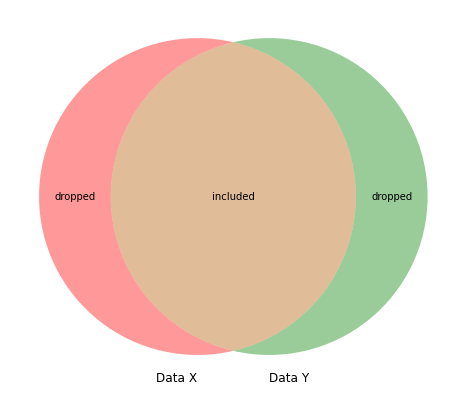

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.